[Click here for live site!](https://m-sender.github.io/ServiceLearning)
# **Analyzing 911 Calls**
# **--Max Sender and Sam Traylor--**

### Data set link: [Calls for service 2021](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2021/3pha-hum9)

What this data set is a collection of 9-1-1 calls in 2021 in the New Orleans Area. This set contains basic things such as the type of incident, where it was, the police department, and timing, and more.

## Questions

#### The direction we're going with our project will focusing more on the crime aspect of the data set. This route will be more focused on answering questions about crime in specific areas instead of the emergency response.

*   Most frequent crimes in specific areas?

*   Based on the value counts of each type of crime in each area can we generalize patterns like violent crime happening more in one area, theft in another, etc?

*   What are the most frequest crimes by time of day in conjunction with a specific area?

#### We find this data set to be very insightful and can answer a lot of different questions. Another dataset that could be of use is [Police Zone Information](https://data.nola.gov/dataset/Police-Zones/fngt-zkj9). This lets us expand our questions to answer more zone and area specific questions. Questions that we can answer going this route are:

*   Average response time by incident?

*   Average response time by zone/area?

*   Average response time by incident in specific areas?

#### We will also be looking at and loading in Census data pertaining to the relavent zipcodes that are in the Calls to Service dataset.

## Collaboration plan:

We plan to collaborate via meetings over zoom, and store our data in a shared github. Any particular challenges that have to be solved in a pair-programming setting will be dealt with using live share on vscode.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_Calls_untidy = pd.read_csv("../data/Calls_for_Service_2021.csv")
df_zones_untidy = pd.read_csv("../data/Police_Zones_data.csv")

In [3]:
df_Calls = df_Calls_untidy.drop(columns=['NOPD_Item','Type','InitialType','MapX','MapY','Disposition','Beat'])
#set type to date time objects
df_Calls = df_Calls.astype({'TimeCreate':'datetime64[ns]','TimeDispatch':'datetime64[ns]',"TimeArrive":'datetime64[ns]',"TimeClosed":'datetime64[ns]'})
df_Calls.head()

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:40:31,Necessary Action Taken,Y,Vicksburg St & Brooks St,70124,3,POINT (-90.10764787 29.99729994)
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301)
2,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 03:03:53,Necessary Action Taken,Y,Decatur St & Iberville St,None,8,POINT (-90.06636912 29.95282347)
3,FIREWORKS,1A,FIREWORKS,2J,2021-01-01 00:02:13,NaT,NaT,2021-01-01 00:17:36,VOID,N,055XX Sutton Pl,70131,4,POINT (-89.9964721 29.91905338)
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289)


**Columns Explained:**
* TypeText: Type of incident (text)
* Priority: Priority of incident (ID)
* InitialTypeText: Initial type of incident (text)
* InitialPriority: Initial priority of incident (ID)
* TimeCreate: Time of incident
* TimeDispatch: Time of dispatch
* TimeArrive: Time of arrival
* TimeClose: Time of closure
* DispositionText: Disposition of incident (text)
* SelfInitiated: Self-initiated (Y or N)
* BLOCK_ADDRESS: Block address of incident
* Zip: Zip code of incident
* PoliceDistrict: Police district of incident (ID)
* Location: Location of incident (ID)
Each entry in the dataset in a unique call to 911 dispatch with relevant information.


In [4]:
df_zones_untidy.head(5)
df_zones = df_zones_untidy.set_index("OBJECTID")
df_zones.head()

,the_geom,Zone,District,Shape_Length,Shape_Area
OBJECTID,,,,,
1883,MULTIPOLYGON (((-90.066369220964 29.9528235013...,8C,8,6792.167688,2.012343e+06
1855,MULTIPOLYGON (((-90.096467011995 29.9414493437...,6K,6,8518.748545,4.324270e+06
1860,MULTIPOLYGON (((-90.100235367426 29.9209080675...,6P,6,11703.354343,7.651238e+06
1784,MULTIPOLYGON (((-90.108388478789 29.9349666704...,2I,2,14995.498757,1.318799e+07
1847,MULTIPOLYGON (((-90.065506929482 29.9391674081...,6C,6,13163.392602,5.747707e+06


**Columns Explained:**
* the_geom: Polygon defining the zone in question
* OBJECTID: The ID of the zone
* Zone: The police zone
* District: The district within the zone
* Shape_Length: The perimeter of the zone
* Share_Area: The the area inside of the zone

In [5]:
#Using that same response time column, we could look at the means across different areas (using the police district or zip column of this dataset)
#Using the results of the last question, we could further specify the avergage response time across incident type column values AND area column values.
#Using zone information and response time, determine "holes" in the zones where response time is higher than the norm or where the area has an increase in crime due to the response times.
#Get the value counts of each different crime for each time of day (we could categorize into several-hour windows like afternoon, evening, night, late night)
#We could use measures of variance like the standard deviation from average response time, which would allow us to identify 'holes' wherever the response time is far higher than average.
df_Calls["responseTime"] = df_Calls.TimeArrive - df_Calls.TimeDispatch

print("Maximum response time: ", df_Calls.responseTime.max())
print("Mean response time: ", df_Calls.responseTime.mean(), "\n") 

mean_by_zone = df_Calls.groupby(["PoliceDistrict"])
for group in mean_by_zone:
    print("Average response time in District", group[0], ": ", group[1].responseTime.mean())

Maximum response time:  3 days 01:03:27
Mean response time:  0 days 00:07:38.175869587 

Average response time in District 0 :  0 days 00:01:53.575574600
Average response time in District 1 :  0 days 00:05:16.409412358
Average response time in District 2 :  0 days 00:05:30.057592679
Average response time in District 3 :  0 days 00:06:21.208254123
Average response time in District 4 :  0 days 00:04:48.211173576
Average response time in District 5 :  0 days 00:10:29.393924408
Average response time in District 6 :  0 days 00:06:54.651413444
Average response time in District 7 :  0 days 00:17:43.915321735
Average response time in District 8 :  0 days 00:05:38.026938803


In [6]:
#Get 30 most frequent crimes
new_df = df_Calls.TypeText.value_counts()
top_Call_df = df_Calls[df_Calls.TypeText.isin(new_df[2:29].index)]
top_Call_df

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,responseTime
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),0 days 00:04:02
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289),NaT
7,DISCHARGING FIREARM,2D,DISCHARGING FIREARM,2D,2021-01-01 00:04:11,2021-01-01 00:59:42,2021-01-01 00:59:57,2021-01-01 01:06:54,GONE ON ARRIVAL,N,011XX Blk Tupelo St,70117,5,POINT (-90.01110609 29.96044253),0 days 00:00:15
8,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:04:19,2021-01-01 00:53:10,2021-01-01 01:35:08,2021-01-01 01:56:55,REPORT TO FOLLOW,N,012XX Blk Elysian Fields Ave,70116,5,POINT (-90.05709394 29.97004982),0 days 00:41:58
11,AUTO ACCIDENT WITH INJURY,2D,AUTO ACCIDENT WITH INJURY,2D,2021-01-01 00:06:45,2021-01-01 00:11:23,2021-01-01 01:13:38,2021-01-01 04:22:50,REPORT TO FOLLOW,N,St Claude Bridge Westbound,70117,5,POINT (-90.02737517 29.96389326),0 days 01:02:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378670,MEDICAL,2D,INCIDENT REQUESTED BY ANOTHER AGENCY,2A,2021-11-09 01:56:00,2021-11-09 01:57:13,2021-11-09 02:04:41,2021-11-09 03:10:41,REPORT TO FOLLOW,N,009XX Lesseps St,70117,5,POINT (0 0),0 days 00:07:28
378673,RETURN FOR ADDITIONAL INFO,1I,RETURN FOR ADDITIONAL INFO,1I,2021-11-09 09:28:18,NaT,2021-11-09 09:28:18,2021-11-09 10:19:19,Necessary Action Taken,Y,016XX Perdido St,70112,8,POINT (-90.08007699 29.95437505),NaT
378674,RETURN FOR ADDITIONAL INFO,1I,RETURN FOR ADDITIONAL INFO,1I,2021-11-09 10:42:16,NaT,2021-11-09 10:42:16,2021-11-09 11:38:44,Necessary Action Taken,Y,019XX Mlk Blvd,70113,6,POINT (-90.08009571 29.94132428),NaT
378679,TRAFFIC STOP,1J,TRAFFIC STOP,1J,2021-11-09 18:37:02,NaT,2021-11-09 18:37:02,2021-11-09 18:38:10,VOID,Y,Approx Loc: 021XX Jackson Ave,70113,6,POINT (-90.08515667 29.93937833),NaT


The calls recieved are overwhelmingly either area checks or "complaint other" types. Because these are very generic and non-descriptive categories that don't tell much about the problems a district is facing, and because they skew the dataset by making up a massive portion, we remove those calls.

In [7]:
type_by_district = top_Call_df[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
type_by_zipcode = top_Call_df[['Zip','TypeText']].pivot_table(index=['Zip'],columns=['TypeText'],aggfunc=np.count_nonzero)

df_Calls_marg_district = type_by_district.T / type_by_district.T.sum()
df_Calls_marg_zip = type_by_zipcode.T / type_by_zipcode.T.sum()
pop_district = type_by_district.T.idxmax()
pop_zip = type_by_zipcode.T.idxmax()
type_by_district_with_freq =  pd.merge(type_by_district, pop_district.rename('Most Frequent'), 'outer',on='PoliceDistrict')
type_by_zipcode_with_freq = pd.merge(type_by_zipcode, pop_zip.rename('Most Frequent'), 'outer',on='Zip')

**From now on, when regarding crime, only the 30 most frequent types of crime will be used.**

In [8]:
print("Most Frequent Crimes by District:") 
print(pop_district)

Most Frequent Crimes by District:
PoliceDistrict
0             TRAFFIC STOP
1           BUSINESS CHECK
2           BUSINESS CHECK
3           BUSINESS CHECK
4           BUSINESS CHECK
5      DISTURBANCE (OTHER)
6      DISTURBANCE (OTHER)
7    BURGLAR ALARM, SILENT
8      DISTURBANCE (OTHER)
dtype: object


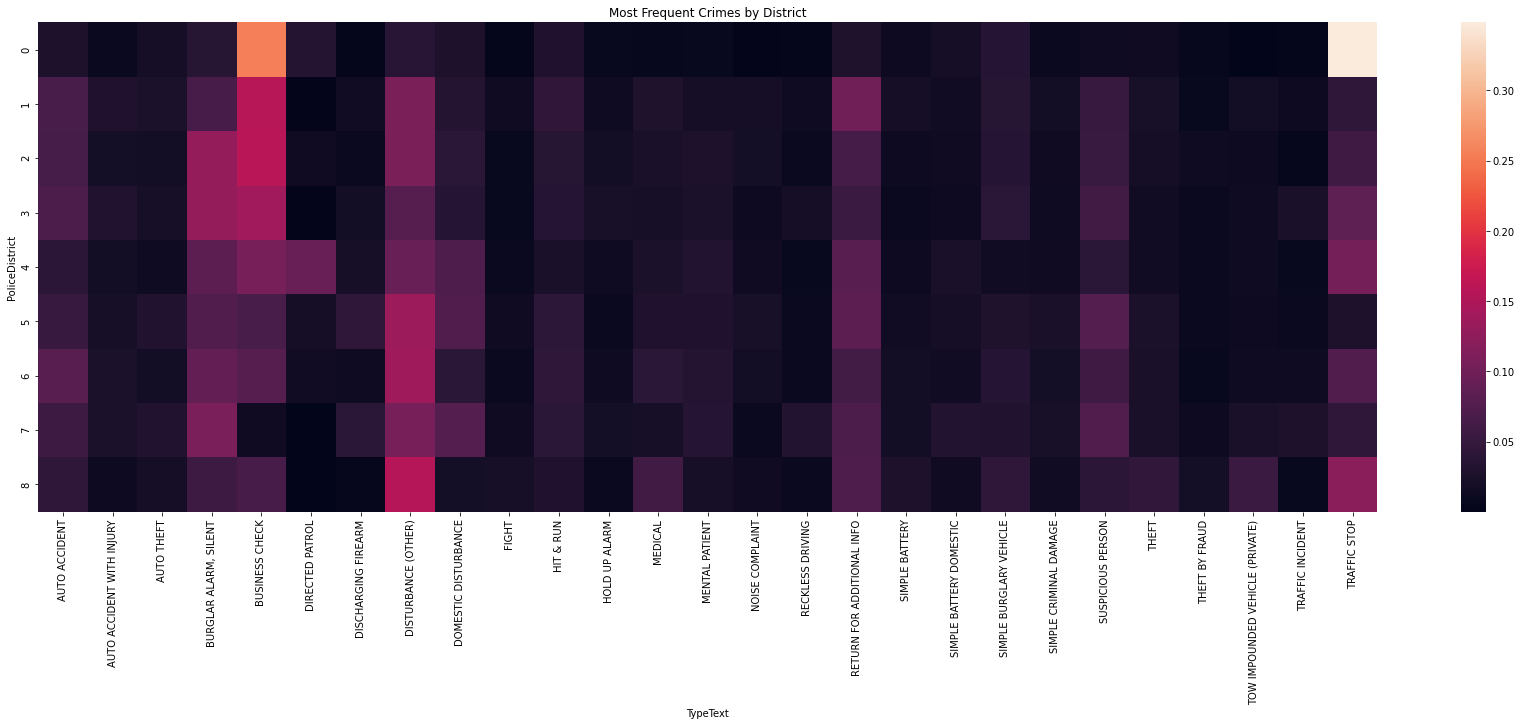

In [9]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by District")

heat_map_districts_marginal = sns.heatmap(df_Calls_marg_district.T)

The graph above is showing the conditional distribution of types of crime by police district, displayed in a heatmap.
This could be a good metric to work with as we analyze the types of crimes and the distribution of crimes in each police district.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by District'}, ylabel='PoliceDistrict'>

<AxesSubplot:title={'center':'Count of type of Crime by District'}, ylabel='PoliceDistrict'>

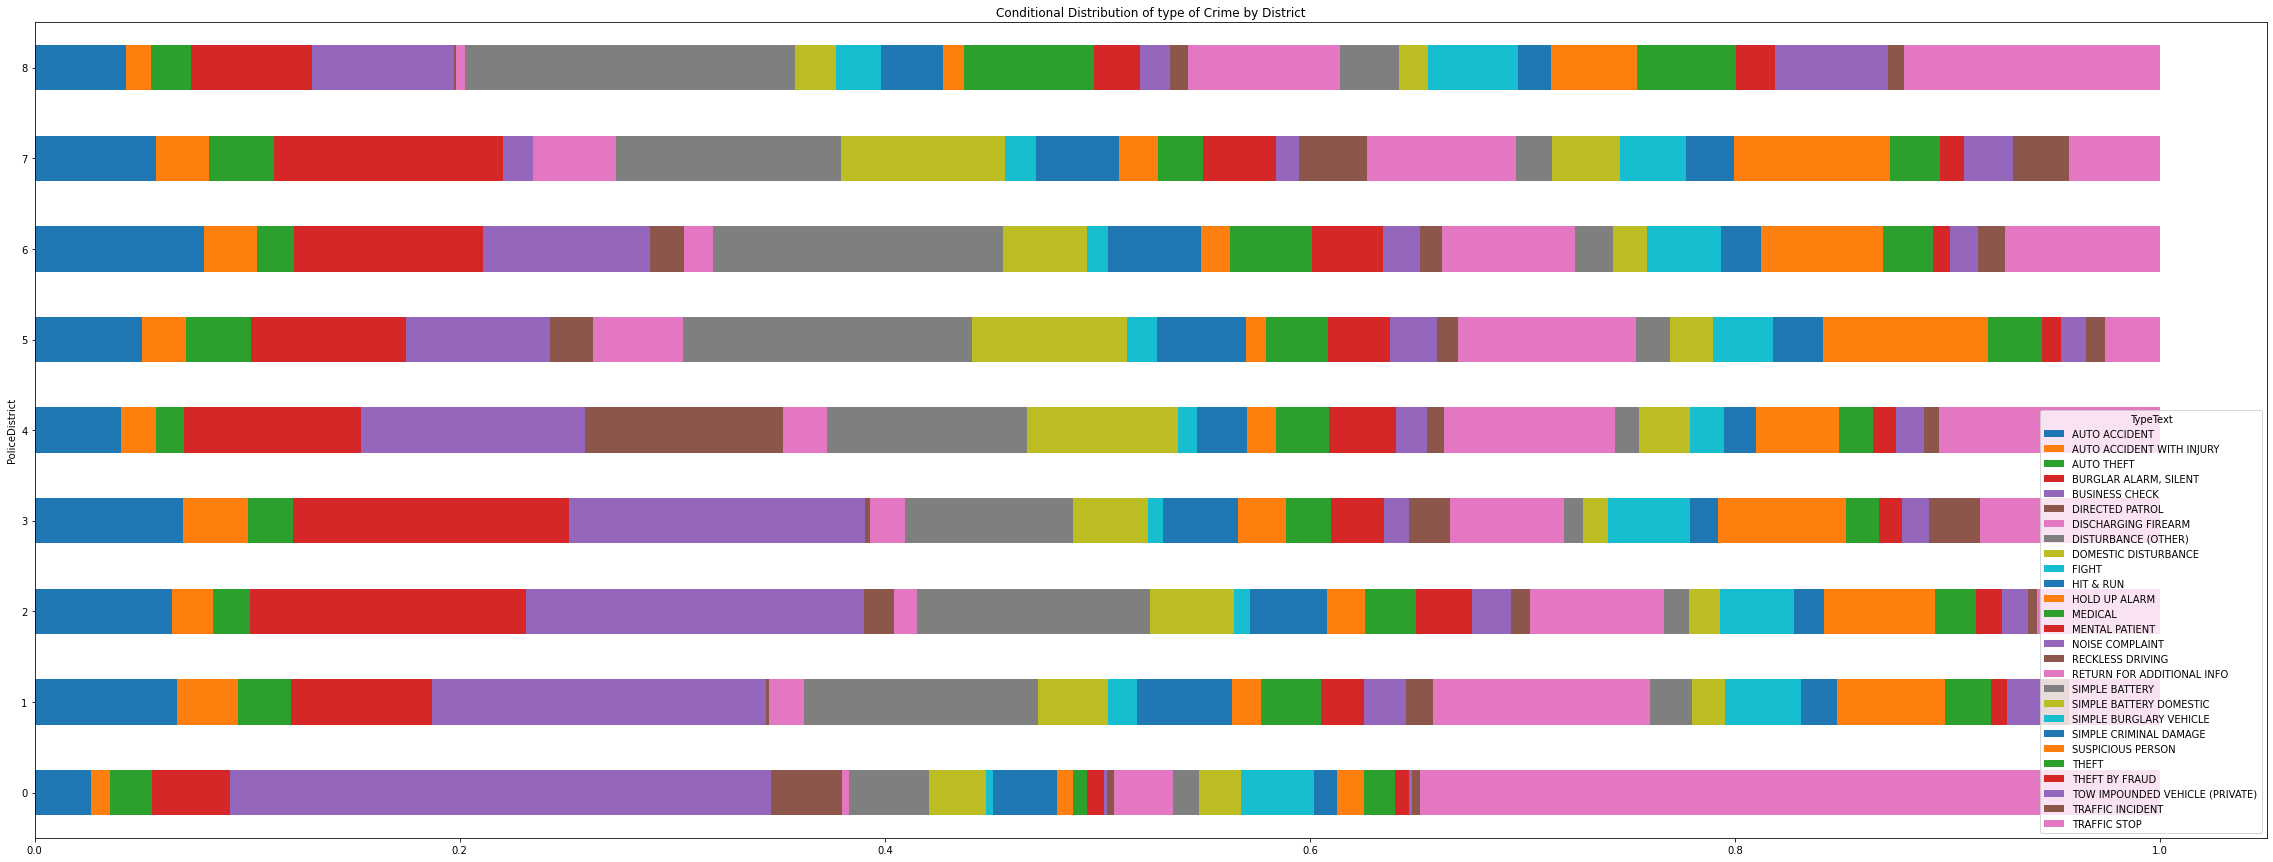

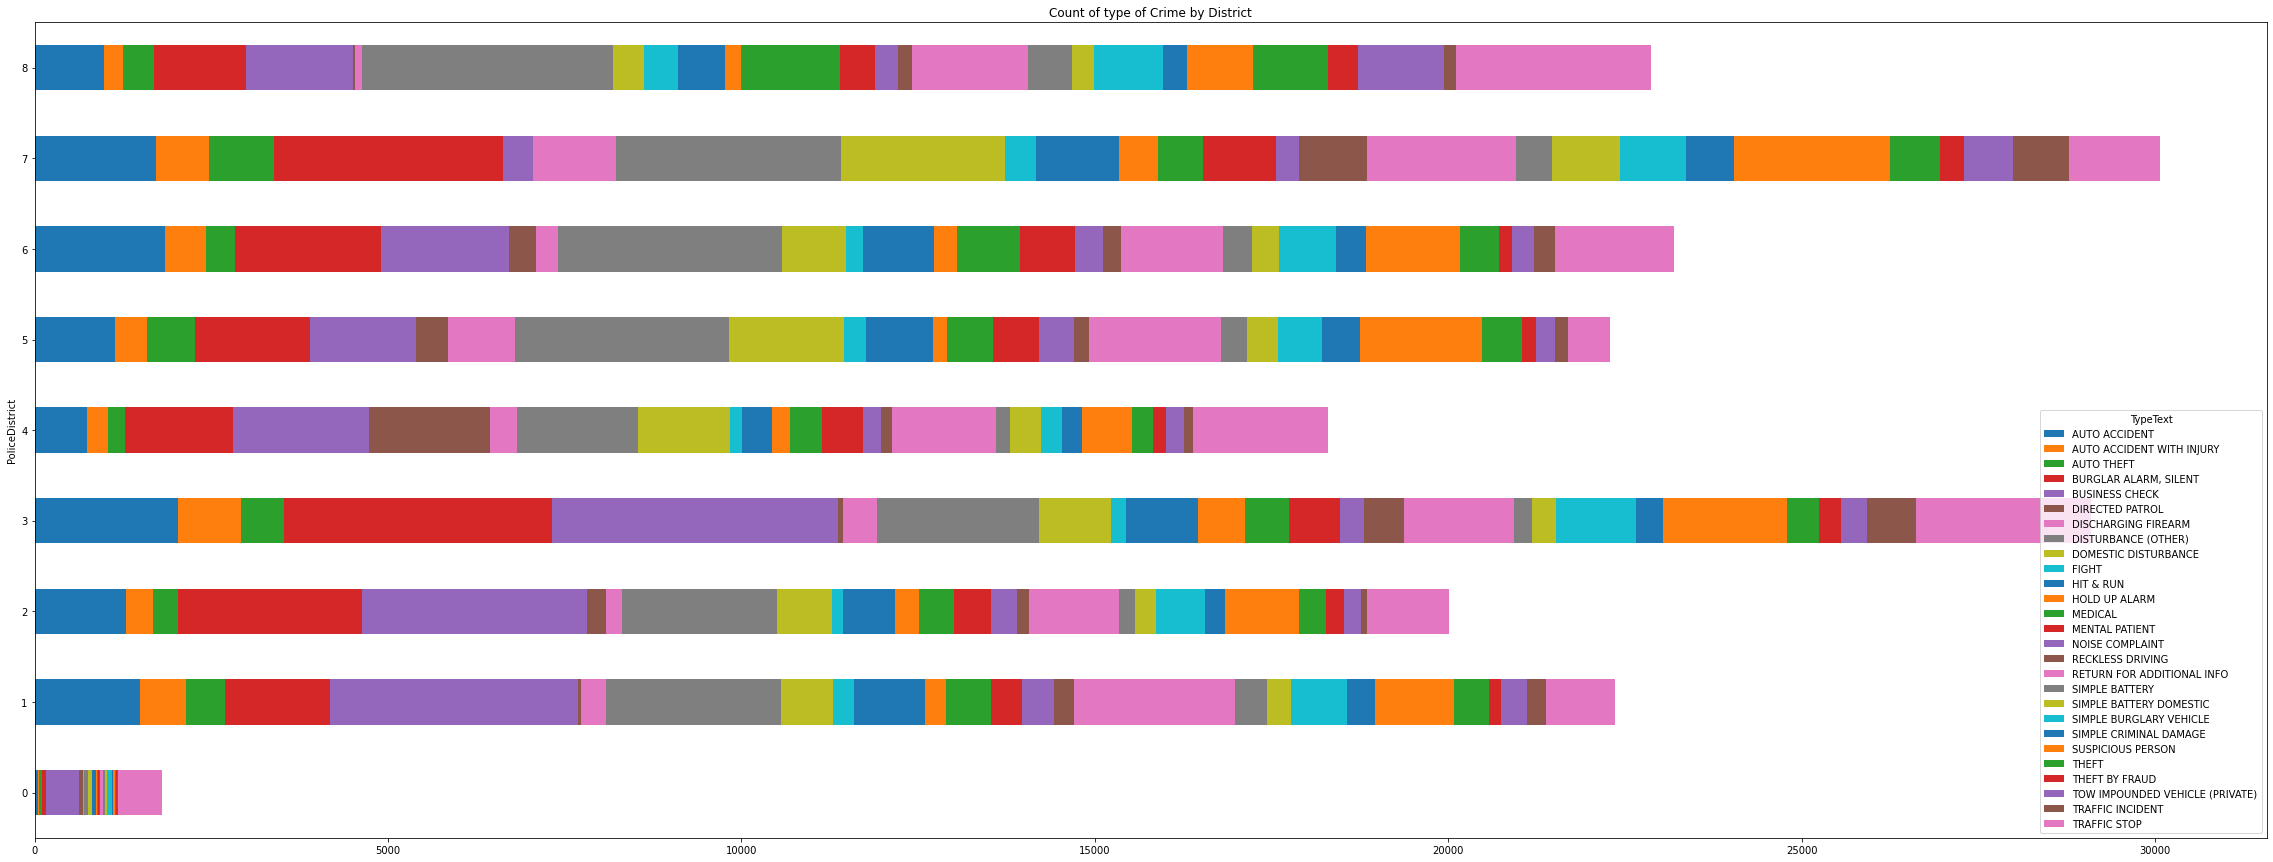

In [10]:
df_Calls_crossTab = pd.crosstab(top_Call_df['PoliceDistrict'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by District"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by District")

The first graph above is the Conditional Distribution of type of Crime by District. The conditional distribution is the probability of a crime type happening in a district. The conditional distribution is calculated by taking the number of crimes of a certain type in a district and dividing it by the total number of crimes in that district.


The second graph above is the Count of type of Crime by District. The count is the number of crimes of a certain type in a district.


Most Frequent Crimes by Zipcode:
Zip
70112    RETURN FOR ADDITIONAL INFO
70113           DISTURBANCE (OTHER)
70114                BUSINESS CHECK
70115         BURGLAR ALARM, SILENT
70116           DISTURBANCE (OTHER)
70117           DISTURBANCE (OTHER)
70118                BUSINESS CHECK
70119                BUSINESS CHECK
70122         BURGLAR ALARM, SILENT
70124                  TRAFFIC STOP
70125                BUSINESS CHECK
70126           DISTURBANCE (OTHER)
70127    RETURN FOR ADDITIONAL INFO
70128         BURGLAR ALARM, SILENT
70129         BURGLAR ALARM, SILENT
70130           DISTURBANCE (OTHER)
70131               DIRECTED PATROL
70148                 AUTO ACCIDENT
None                   TRAFFIC STOP
dtype: object


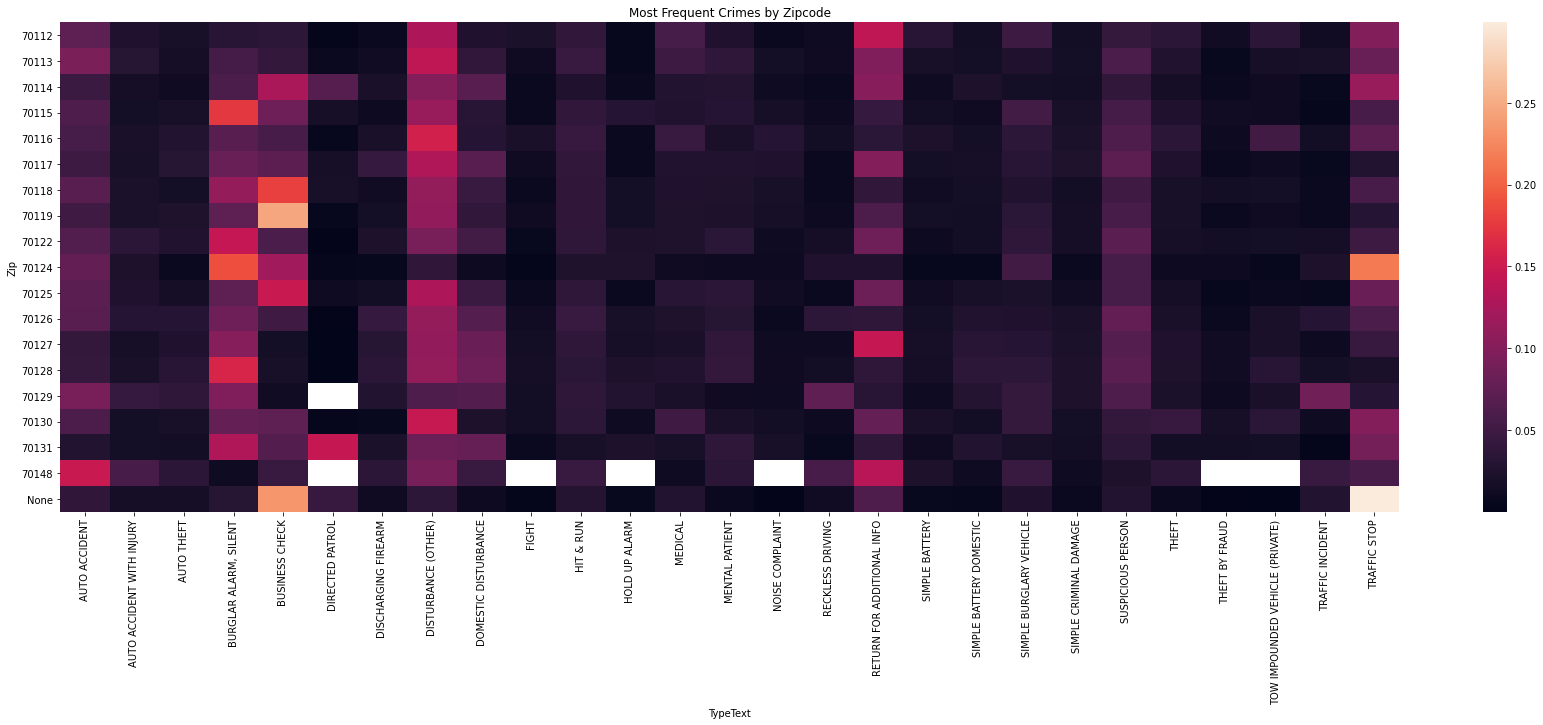

In [11]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by Zipcode")
print("Most Frequent Crimes by Zipcode:")
print(pop_zip)
heat_map_zipcodes_marginal = sns.heatmap(df_Calls_marg_zip.T)
    

The graph above is showing the conditional distribution of types of crime by zipcode, displayed in a heatmap.
This could be a good metric to work with as we analyze the types of crimes and the distribution of crimes in each zipcode.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by Zipcode'}, ylabel='Zip'>

<AxesSubplot:title={'center':'Count of type of Crime by Zipcode'}, ylabel='Zip'>

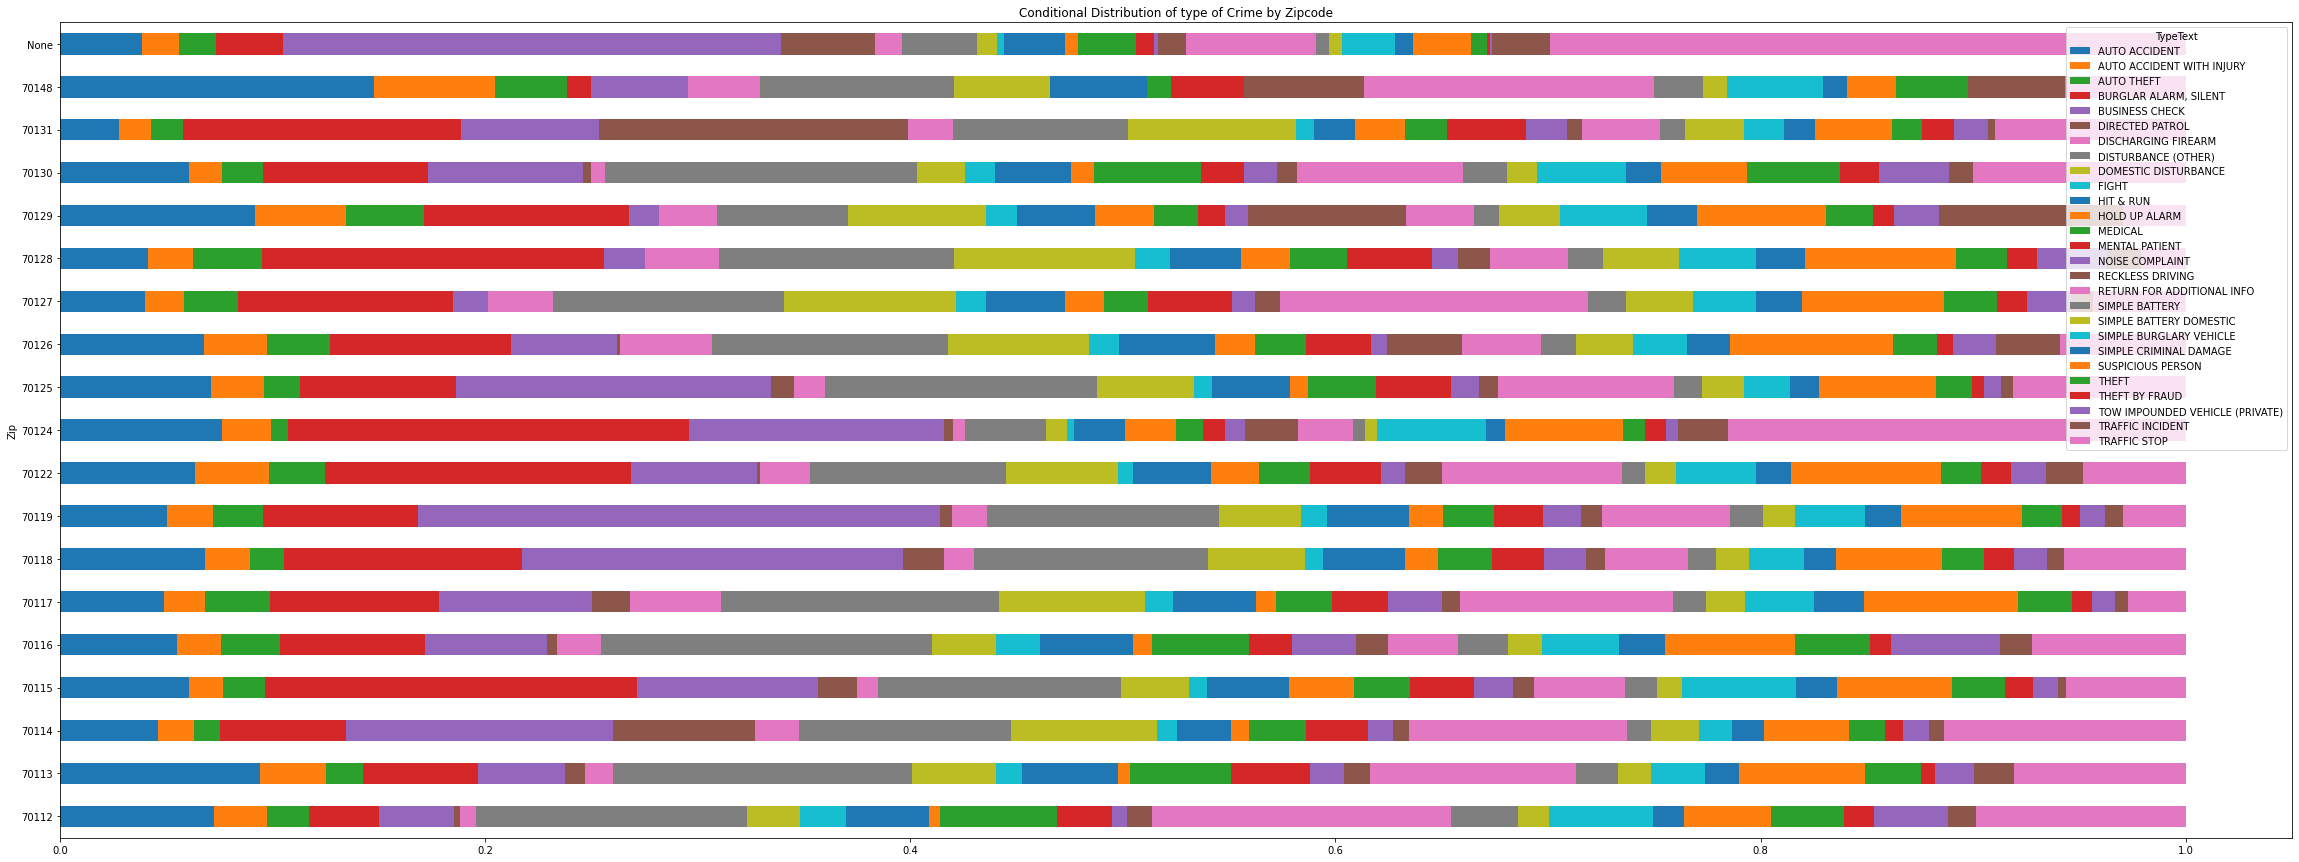

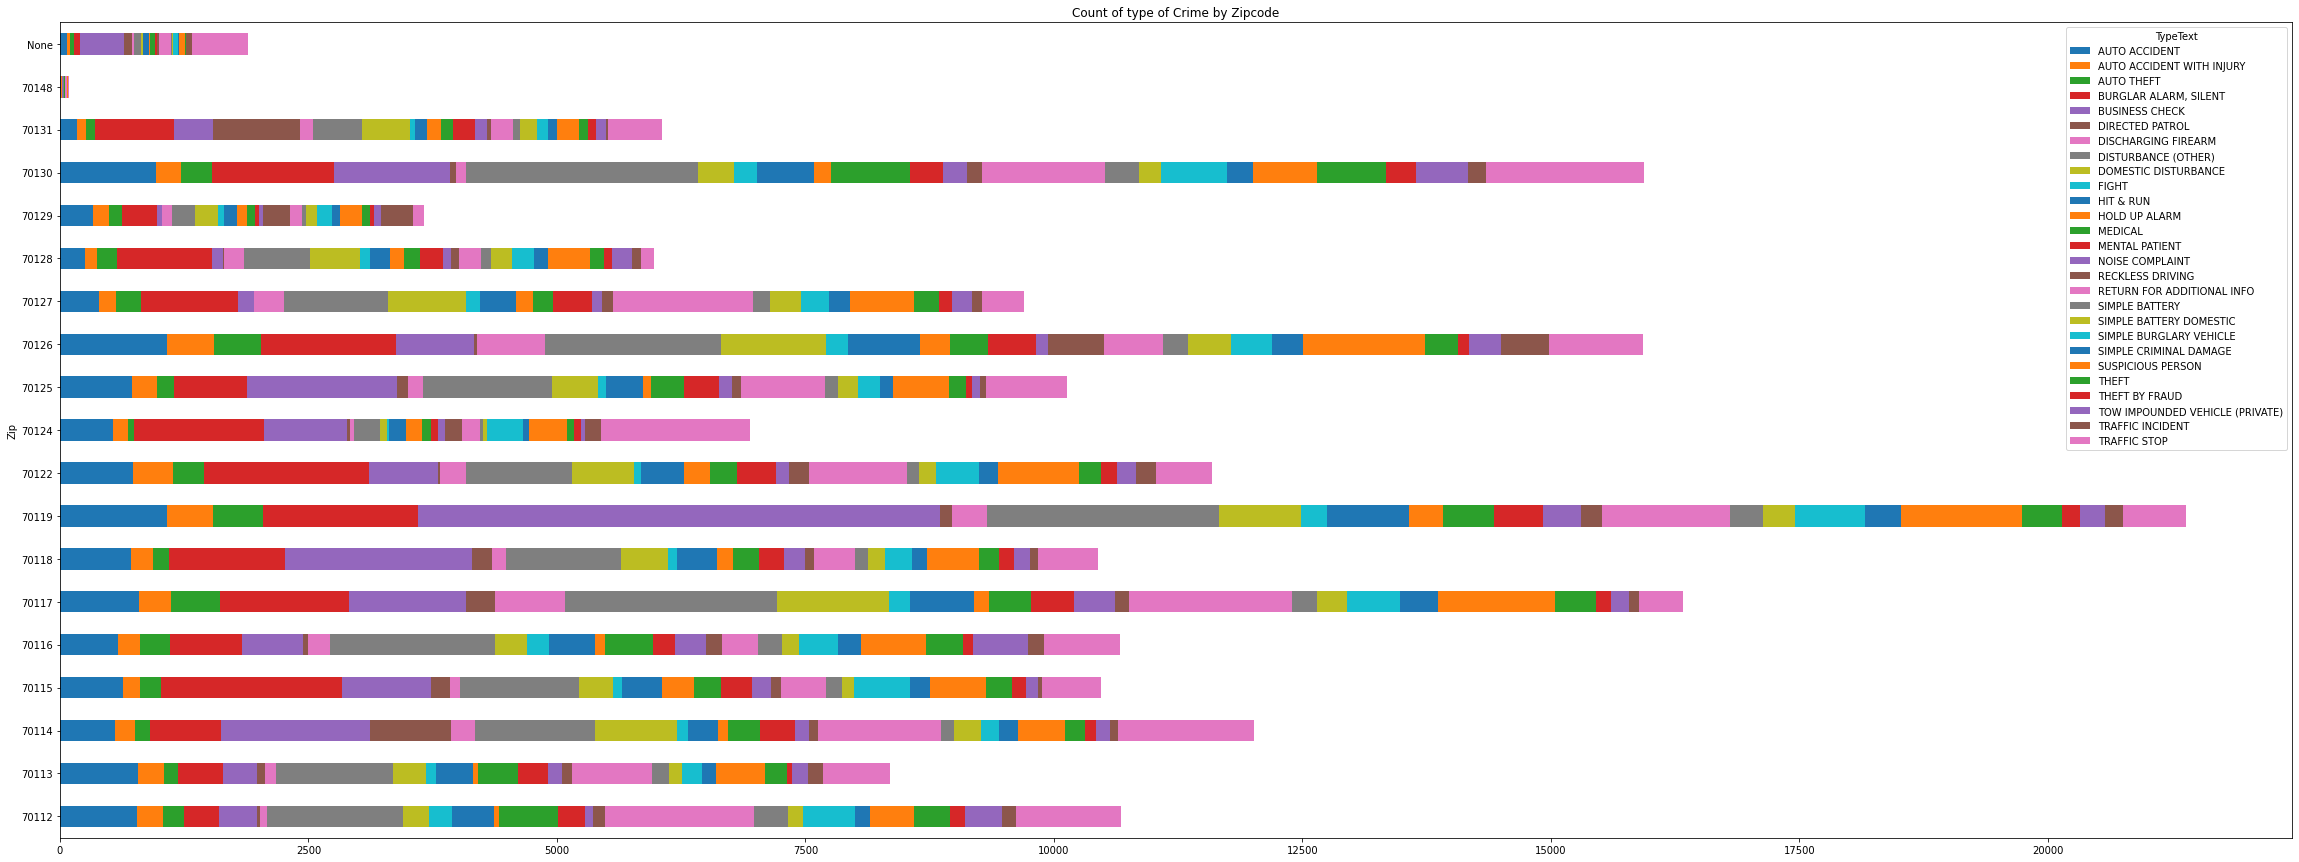

In [12]:
df_Calls_crossTab = pd.crosstab(top_Call_df['Zip'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by Zipcode"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by Zipcode")

The first graph above is the Conditional Distribution of type of Crime by Zipcode. The conditional distribution is the probability of a crime type happening in a Zipcode. The conditional distribution is calculated by taking the number of crimes of a certain type in a Zipcode and dividing it by the total number of crimes in that Zipcode.
The second graph above is the Count of type of Crime by Zipcode. The count is the number of crimes of a certain type in a Zipcode.


**Census Level Data by Zipcode**

The below data is taken from [https://data.census.gov/](https://data.census.gov/) and we have taken certain statistics from the data set that we think would work well for our analysis. These include income, health care coverage, unemployment, and education.
A scraping bot is being built top scrape the data from the site, but for now we have taken the numbers from the site and manually entered them.

In [30]:
#BOT CODE
'''from bs4 import BeautifulSoup as bf
import requests_html as reqHtml
zip_range = df_Calls.Zip.unique()

baseUrl = "https://data.census.gov/cedsci/all?q=ZCTA5"
space_ele = "%20"
income = []
health = []
employment =[]
education = []

requ_Variables = [("Income%20and%20Poverty",income),("%20Health",health),("%20employment",employment),("%20Education",education)]
browser = reqHtml.AsyncHTMLSession()
for zipcodeBase in zip_range:
    for requ_Variable in requ_Variables:
            info = browser.get(baseUrl+space_ele+zipcodeBase+space_ele+requ_Variable[0])  
            print(info)
            #info.html.render()
            parse_HTML = info.page_source
            print(parse_HTML)
            soup = bf(parse_HTML,"html.parser")
            result = soup.find("div",class_="aqua-card-title-text")
            result = result.text
            requ_Variable[1].append(result)'''

####END TEMPORARY BOT CODE

'''print(['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148'])'''

zips = ['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148']
income = [96844,66499,np.nan,52312,27026,30806,30264,48919,18148,39827,
          49439,39506,27190,53946,36414,48919,46526,np.nan,36950,np.nan] 
health = [3.8,7.2,np.nan,8.9,9.0,10.8,13.6,12.7,14.5,11.6,
          12.1,9.2,8.6,8.1,7.5,7.6,7.9,np.nan,11.7,np.nan] #percent without health care coverage from 2019
employment = [70.5, 66.1, np.nan, 59.5, 51.4, 50.7, 53.3, 54.7, 47.1, 55.5, 69.1, 69.1, 54.2, 50.6, 66.5, 53.2, 57.6,
            56.5, np.nan, 52.5] 
education = [68.3, 60.4, np.nan, 34.1, 20.9, 21.9, 25.9, 41.3, 23.5, 38.1, 58.2, 31.1, 19.4, 57.8, 26.8, 50.5, 41.2,
            np.nan, 13.2, np.nan] 
census_zip_df = pd.DataFrame({"Zip":zips,"Income":income,"Health":health,"Employment":employment,"Education":education})   

census_zip_df.dropna(axis=0)

print("Mean Income:",census_zip_df["Income"].mean())
print("Mean Healthcare %:",census_zip_df["Health"].mean())
print("Mean Employment %:",census_zip_df["Employment"].mean())
print("Mean Education:",census_zip_df["Education"].mean())

top_Call_df.merge(census_zip_df, on="Zip")

Mean Income: 44090.294117647056
Mean Healthcare %: 9.694117647058825
Mean Employment %: 57.67222222222222
Mean Education: 37.21176470588236


,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,responseTime,Income,Health,Employment,Education
0,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),0 days 00:04:02,66499.0,7.2,66.1,60.4
1,FIGHT,2D,FIGHT,2D,2021-01-01 00:18:32,2021-01-01 01:45:23,2021-01-01 01:49:07,2021-01-01 01:56:15,GONE ON ARRIVAL,N,015XX 6th St,70115,6,POINT (-90.0867337 29.92955006),0 days 00:03:44,66499.0,7.2,66.1,60.4
2,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:24:54,NaT,NaT,2021-01-01 01:00:48,VOID,N,036XX Saint Charles Ave,70115,6,POINT (-90.09439864 29.92697276),NaT,66499.0,7.2,66.1,60.4
3,AUTO THEFT,1D,AUTO THEFT,1D,2021-01-01 03:15:08,2021-01-01 03:15:08,2021-01-01 03:15:08,2021-01-01 05:11:18,REPORT TO FOLLOW,Y,8th St & Magazine St,70115,6,POINT (-90.08546601 29.92455169),0 days 00:00:00,66499.0,7.2,66.1,60.4
4,"BURGLAR ALARM, SILENT",2E,"BURGLAR ALARM, SILENT",2E,2021-01-01 03:46:26,2021-01-01 03:48:02,2021-01-01 03:52:11,2021-01-01 04:03:06,Necessary Action Taken,N,055XX Loyola Ave,70115,2,POINT (-90.11372755 29.93293323),0 days 00:04:09,66499.0,7.2,66.1,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189769,BUSINESS CHECK,1K,BUSINESS CHECK,1K,2021-01-30 23:43:55,2021-01-30 23:43:55,2021-01-30 23:43:55,2021-01-30 23:59:29,Necessary Action Taken,Y,004XX N Carrollton Ave,NaN,3,POINT (-90.0987456 29.97730853),0 days 00:00:00,NaN,NaN,56.5,NaN
189770,HIT & RUN,1A,HIT & RUN,1G,2021-01-31 03:32:22,2021-01-31 03:36:11,2021-01-31 03:54:29,2021-01-31 04:53:03,REPORT TO FOLLOW,N,012XX Patterson St,NaN,4,POINT (-90.0434741 29.9546932),0 days 00:18:18,NaN,NaN,NaN,NaN
189771,HIT & RUN,1A,HIT & RUN,1G,2021-01-31 03:32:22,2021-01-31 03:36:11,2021-01-31 03:54:29,2021-01-31 04:53:03,REPORT TO FOLLOW,N,012XX Patterson St,NaN,4,POINT (-90.0434741 29.9546932),0 days 00:18:18,NaN,NaN,56.5,NaN
189772,AUTO ACCIDENT,1A,AUTO ACCIDENT,1E,2021-02-01 09:44:29,2021-02-01 10:49:02,2021-02-01 11:10:22,2021-02-01 11:19:25,DUPLICATE,N,039XX France Road Pkwy,NaN,5,POINT (-90.02953867 29.98837106),0 days 00:21:20,NaN,NaN,NaN,NaN


In this dataframe we put together the percent of education bachelors or higher, the percent of employment, mean gross income per capita, and percent without healthcare coverage. This data, organized by zip code, will allow us to associate these demographic features with different regions that experience a high rate of crime, a prevalence of a certain type of crime, or a long response time

**Our Future Plans**
We plan to continue working on this project and expand our analysis to develop a predicitve model of which areas in the parish will get what kind of calls (violent crime, theft, vandalism etc.), when the calls will come in (based on the observed most common time of day for that crime), and what the response time of that kind of call would likely be. This data can help not only establish patterns that would help law enforcement target certain kinds of crime, but would also point towards any district in particular where preparedness needs to be increased (if an area's mean response time significantly deviates from the standard, for example).

Another model we are planning on making is analyzing the cross between the type of crime/ frequency to income and other related fields by zipcodes avaible in the 911 call data set. After analyzing the crossing of data, we hope to find a line or certain characteristics that make some zipcodes more likely to be involved in certain types of crimes. With this "line" or characteristcs, we can then predict the likelihood of a zipcode being involved in a certain type of crime, and be able to tell when zipcodes are creeping towards that line/ ways to escape and improve.

# MODELING

In [36]:
routine_noncriminal = ["AUTO ACCIDENT", "AUTO ACCIDENT WITH INJURY", "BUSINESS CHECK", 'DIRECTED PATROL', 
                       'DISTURBANCE (OTHER)', "MEDICAL", 'MENTAL PATIENT', 'NOISE COMPLAINT', 'RETURN FOR ADDITIONAL INFO',
                       'SUSPICIOUS PERSON', 'TRAFFIC INCIDENT', 'TRAFFIC STOP', 'TOW IMPOUNDED VEHICLE (PRIVATE)',
                       'TRAFFIC STOP']

violent_crime = ['FIGHT', 'HIT & RUN', 'SIMPLE BATTERY', 'SIMPLE BATTERY DOMESTIC']
nonviolent_crime = ['SIMPLE BURGLARY VEHICLE', 'THEFT BY FRAUD', 'SIMPLE CRIMINAL DAMAGE']

potentially_violent_crime = ['THEFT', 'BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM', 'AUTO THEFT', 'HOLD UP ALARM',
                             'RECKLESS DRIVING', 'DOMESTIC DISTURBANCE'] 

top_Call_df['typeCall'] = np.nan

top_Call_df["typeCall"] = top_Call_df.TypeText.map(lambda x: 'routine_noncriminal' if (x in routine_noncriminal) else 'violent_crime' if (x in violent_crime) else 'nonviolent_crime' if (x in nonviolent_crime) else 'potentially_violent_crime' if (x in potentially_violent_crime) else "other")

top_Call_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,responseTime,typeCall
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),0 days 00:04:02,potentially_violent_crime
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289),NaT,potentially_violent_crime
7,DISCHARGING FIREARM,2D,DISCHARGING FIREARM,2D,2021-01-01 00:04:11,2021-01-01 00:59:42,2021-01-01 00:59:57,2021-01-01 01:06:54,GONE ON ARRIVAL,N,011XX Blk Tupelo St,70117,5,POINT (-90.01110609 29.96044253),0 days 00:00:15,potentially_violent_crime
8,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:04:19,2021-01-01 00:53:10,2021-01-01 01:35:08,2021-01-01 01:56:55,REPORT TO FOLLOW,N,012XX Blk Elysian Fields Ave,70116,5,POINT (-90.05709394 29.97004982),0 days 00:41:58,potentially_violent_crime
11,AUTO ACCIDENT WITH INJURY,2D,AUTO ACCIDENT WITH INJURY,2D,2021-01-01 00:06:45,2021-01-01 00:11:23,2021-01-01 01:13:38,2021-01-01 04:22:50,REPORT TO FOLLOW,N,St Claude Bridge Westbound,70117,5,POINT (-90.02737517 29.96389326),0 days 01:02:15,routine_noncriminal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378670,MEDICAL,2D,INCIDENT REQUESTED BY ANOTHER AGENCY,2A,2021-11-09 01:56:00,2021-11-09 01:57:13,2021-11-09 02:04:41,2021-11-09 03:10:41,REPORT TO FOLLOW,N,009XX Lesseps St,70117,5,POINT (0 0),0 days 00:07:28,routine_noncriminal
378673,RETURN FOR ADDITIONAL INFO,1I,RETURN FOR ADDITIONAL INFO,1I,2021-11-09 09:28:18,NaT,2021-11-09 09:28:18,2021-11-09 10:19:19,Necessary Action Taken,Y,016XX Perdido St,70112,8,POINT (-90.08007699 29.95437505),NaT,routine_noncriminal
378674,RETURN FOR ADDITIONAL INFO,1I,RETURN FOR ADDITIONAL INFO,1I,2021-11-09 10:42:16,NaT,2021-11-09 10:42:16,2021-11-09 11:38:44,Necessary Action Taken,Y,019XX Mlk Blvd,70113,6,POINT (-90.08009571 29.94132428),NaT,routine_noncriminal
378679,TRAFFIC STOP,1J,TRAFFIC STOP,1J,2021-11-09 18:37:02,NaT,2021-11-09 18:37:02,2021-11-09 18:38:10,VOID,Y,Approx Loc: 021XX Jackson Ave,70113,6,POINT (-90.08515667 29.93937833),NaT,routine_noncriminal


In [ ]:
#Organize data for crime by violent and non-violent?
#Use the time series data to predict the crime rate by zipcode
time_of_day = df_Calls.TimeCreate.dt.hour
df_Calls['Hour'] = time_of_day
df_Calls['TimeOfDay'] = df_Calls.Hour.map(lambda x: 'Morning' if (x< 12 and x>5) else 'Afternoon' if x < 18 else 'Evening/Night')
df_Calls['TimeOfDay']
df_Calls.groupby('TypeText').TimeOfDay.value_counts()

